### Checking similarity between first document and all other documents using TF-IDF & Cosine Similarity


###### Task : To check if the the author has a distinctive, original writing style. This is achieved using similarity measures across articles written by them

1. Utilizes cosine_similarity, TF-IDF, Jaccard Similarity, and Euclidean distance


In [2]:
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
import re


In [9]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahuljestadi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#To keep the results and comparison clean
import pandas as pd
import numpy as np

In [5]:
#Data corpus of Lakshmi Sankaran Articles
corpus_lakshmi = ["If there is a phrase I would prefer to retire from online bios, personal or professional, it is, “I love travel.” Or some approximation of that sentiment. To clarify, I am not against travellers or those who proudly flaunt their passion for travel. On the contrary, editing a travel magazine has now made me oddly protective of travellers and their ilk. My submission is that “love to travel,” suggested so casually, just doesn’t feel adequate to the depth of emotion it sparks in true devotees.In February, the month of love as endowed by our great gifting industrial complex, we are wrestling with what “love for travel” means in tangible, life-affecting terms. The early throes of discovering travel might not be too dissimilar to the beginnings of a feverish affair. A fleeting scene, sound or feeling that at first arouses, then enchants and eventually, lures us into a hypnotic state, evoking woolly-eyed reveries about what could be.This world, however, is not the most conducive for long-term passion, the kind that demands unflinching sustenance in the midst of distractions from a thousand notifications. Passion has many rivals to contend with. And in flippantly announcing travel as our first love, we are not fully considering the influence our other paramours (work, relationships or money) exert on us.Travellers for life are compulsive. They have to be; there is no other existence. Climate change, marriages, deaths, protests and politics might have to take a backseat. I am reminded of a wanderlust-happy couple that discovered chinks in their relationship during a road trip through Russia. The woman, upset and distraught, offered a solution: cut the trip short to come back home and rekindle their chemistry. The man, however, wouldn’t give up Siberia, despite a chance at a do-over. Please don’t go getting any ideas about breaking hearts but for some travellers, marital bliss too has its limits.","The world’s greatest cities are brutal, unsentimental places, precisely the reason why so many of us fall so irrevocably under their spell. In its worst hour, this bond can curdle into bitter complaints of unrequited affection and everyday torment. “The subway doesn’t work, trash is overflowing and it’s too crowded; this is over.” Let me assure you that right now someone somewhere is uttering these words about your dream metropolis, New York, Rome, Rio De Janeiro. Like an unrepentant cad, the city laughs in their face, “Go on… live without me.” Wresting long-term connections comes with the occasional pang of nostalgic regret. Those who can’t escape their love of cities are destined to keep replaying that first flush of romance, that moment when a city went from a destination to home.A traveller’s sense of a city is always ephemeral. Not that this discredits his or her insights but to genuinely get under the skin of a modern metropolis, we look towards its people, leaning against its sidewalks, reading in café nooks or flirting in nightclubs. One of the best descriptions of city love I’ve read is in a wonderful book on London with a rather circuitous moniker: Londoners: The Days And Nights Of London Now—As Told By Those Who Love It, Hate It, Live It, Left It, And Long For It. In it writer Craig Taylor, who lived in the British capital for years, recalls relocating to Toronto and fielding that pesky question, “How do you feel about London?” He had a complicated answer, “It wasn’t a two-way relationship. It was no use thinking this place loses any sleep over me.”That’s the messy conundrum of a great city, as experienced by its besotted paramours, some of whom can’t kick the habit even if they tried. Travellers attempting to understand an urban jungle are better off trying to study its undercurrents. In September’s ode to five global cities, NGTI attempts to get a measure of their pulse. A writer dives into Belfast’s turbulent past to fully grasp its present-day vibrancy, another digs into the back alleys of Kuala Lumpur’s inimitable heritage food joints. We profile New York’s Hudson Yards, a gaudy spectacle that has divided New Yorkers, and chronicle the rise of Bauhaus in Tel Aviv. Finally we unpack Finland’s oldest city Turku.A city is fertile land for dramatic histories, new narratives and moving stories. Travellers, never immune to these irresistible tales, are bound to pass through its golden gates, over and over.","Part of the allure of a remote place is that the closer we get to it, the more we risk everything that made it precious. For years, Mount Everest inspired a sense of forbidden majesty, which was surmounted only by a few courageous adventurers. It helped that they were entertaining and we were content to immerse ourselves in the stories they wove from these monumental expeditions.In 2019, life-changing experiences are more easily found. This is probably why, when a photo of tourists lined up outside Everest’s summit, as though it were some check-in counter at an airport dispensing visas, was widely debated three months ago, the overwhelming emotion was deflated acceptance. No one in this day and age will be denied their Edmund Hillary moment.In February, the New York Times ran a panicked headline about another solitary paradise, which had long been removed from sustained tourist interference—the Galápagos. “Going to the Galápagos Is Easier and Cheaper Than Ever. That Might Not Be a Good Thing,” it warned. According to the article, “in 2017, 2,41,800 people visited the islands, up from 1,73,419 a decade earlier.”I am not highlighting these concerns as a spoilsport to anyone’s dreams. Travellers have earned their right to be wherever they choose to be. Even more so, seeking out the elusive is neither new nor groundbreaking; people were born of this earthly garden and returning to its comforting delights is the most primal of escapes. But the irony of how long we have this profusion of wilderness has not been lost, especially while we look towards the outdoors for constant nourishment and inspiration.Despite the arguments in favour or against these developments, NGTI’s August edition remains an ode to bona fide outdoor enthusiasts, a sincere testament to how faraway mountains, hidden islands, sweeping canyons continue to wield a magnetic pull over us. We have packed this issue with epic journeys: a 10-day road trip from Iceland’s deep grey volcanic outback, a tropical joyride in Fiji, a playful encounter with wildlife in New Zealand and a first-time skier’s tentative venture onto the slopes of Tahoe.While enjoying these wonderful reads, try to think of that sagacious advice, often doled out when restlessness sneaks its dreary head—“Why not go outside? Get some fresh air?” The outdoors are great for us, this much has been proven. The question now is, can we be great for the outdoors too?","Our year-end edition toasts ultra-indulgence while travelling, featuring itineraries that many will know to be out of their financial reach. In producing these narratives, I was struck by a contrast.Travel today is dominated by minimalists or downsizers, those who preach the gospel of “hard-knock wanderlust.” And they almost always reap universal admiration. They are characters to aspire to, examples of made-for-Instagram sayings such as, “All you need is a backpack” or “#MotorcycleDiaries.” Unable to join these gallivanting philosophers, others marvel at their brave rebellion—oh, to give up the predictability of overpriced tourist traps someday, they sigh.In this context, luxury travel evokes a Molotov cocktail of feelings. A billionaire on a sailboat hosting Jazz Age-style revelries in the French Riviera is inevitably setting himself up for mockery. The heiress, who flits off to shopping holidays in Milan and Dubai, might as well buy an extra pair of sunglasses for the shade directed her way. Extravagance passes muster if it panders to affordability. In the last few years, it has become intertwined with entitlement, a radioactive pejorative today.Upper-class travel doesn’t deserve this slight. As more astute aesthetes have reminded us in the past, refined tastes don’t have to be gauche. Living like royalty might have its privileges but it also spurs a temperament for beauty, grace and sensuality, which is why travellers will always fork out top penny for a night in Rajasthan’s many palace stays.Wealth facilitates the kind of understated exclusivity seen in the English countryside’s several castles or manors, once a venue for elegant ballroom dances. Luxury could also simply mean time well spent—or doing nothing—floating atop a sundeck in an unending stretch of the ocean.Professional travel writers are lucky to be granted access to these private paradises and, in December’s magazine, a handful of them have returned with colourful dispatches. One writer enjoys a happy recreational bubble in the Maldives, another is privy to up close views of big game in Botswana. There is also a roundup of New York’s elite food and drinking haunts, and coverage of the maiden cruise between Mumbai and Goa. All these retreats promise a hedonistic binge: grand feasts of fine wine and champagne, and views hidden from the typical trails.Some of them will test your purse-strings but think of Holly Golightly. She couldn’t lay claim to real Tiffany’s jewels but that never stopped her from getting her heart’s fill, standing outside the window.","I like a bit of pow-wow in any place. Let me rephrase before you think I am eternally hankering for a fight. What I mean is I would choose crooked streets over straight highways, sweaty mayhem over pristine elegance. This is why no matter where I go in this world, coming home to India, and especially Bombay, is never dull. I blame growing up in the city for my pugilistic predilections. One of the many descriptors that Mark Twain used in relation to Bombay was “pow-wow.” The place seemed to confound him: “Bewitching”, “Bewildering”, “Enchanting”, “Arabian Nights come again?”—the man was repulsed and riveted at the same time. It was a place befitting the number of exclamations he used.At 13, I was yet to be permitted the pleasures of travelling unchaperoned outside Bombay but within its confines, I had free rein to indulge my inner flâneur. I became the weekend loafer, slacking through parts of the city I really had no business being in. My itinerary hardly ever changed: Take the BEST bus to Chowpatty; after filling up on chaat, sample some more at the khau gully in Churchgate; sometimes, pretend to shop for music I could not afford at Kala Ghoda’s Rhythm House, where the desperately-trying-to-be-hip hung out in the 1990s. The final stretch was always my favourite: trudging along to my personal Shangri-La, Victoria Terminus.At VT, I parsed the sea of faces. I drummed up mind games to fill time like “Who’s new and who isn’t?” Spotting either was fairly simple. The former bunch bears dazed glances and open mouths. A person gyrating through the mob with minimum physical contact had been practising for the Local Train Olympics for a few years at least. When it was my turn to head back to the suburbs, I warmed up, adopted a stance that would make Usain Bolt proud and dashed off like the Flash into an incoming train. Like millions of others, Bombay taught me independent travel, in the crudest sense of the term. And it prepared me for the swirling madness that lies in the rest of India.In August, we are showcasing and extolling the allure of domestic journeys. Hampi, celebrated for its ruins, reveals something unexpected after every visit. In Hyderabad, we feature Sufi shrines, some of which abound in nooks you wouldn’t notice. Banaras’s cosy classical music cafés leave a lasting impression on a newcomer’s heart, and in West Bengal, a heritage renaissance seems to be afoot in Serampore. It is incumbent that travellers make forays far from where they live but, every so often, it doesn’t hurt to stumble upon surprises in our own backyard."]

In [6]:
documents = pd.DataFrame(corpus_lakshmi,columns = ['corpus_lakshmi'])

In [7]:
#Removing stop words
stop_remove = stopwords.words('english')

In [8]:
documents['documents_cleaned']=documents.corpus_lakshmi.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_remove))

In [9]:
print(documents['documents_cleaned'])

0    phrase would prefer retire online bios  person...
1    world s greatest cities brutal  unsentimental ...
2    part allure remote place closer get it  risk e...
3    year end edition toasts ultra indulgence trave...
4    like bit pow wow place  let rephrase think ete...
Name: documents_cleaned, dtype: object


In [10]:
# Initialize an instance of tf-idf Vectorizer
tfidfvectoriser=TfidfVectorizer()
# Generate the tf-idf vectors for the corpus
tfidfvectoriser.fit(documents.documents_cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents.documents_cleaned)

In [11]:
# compute and print the cosine similarity matrix
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray()

In [12]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {documents.iloc[doc_id]["corpus_lakshmi"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar = np.argsort(similarity_matrix[doc_id])[::-1]
    for ix in similar:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {documents.iloc[ix]["corpus_lakshmi"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [13]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: If there is a phrase I would prefer to retire from online bios, personal or professional, it is, “I love travel.” Or some approximation of that sentiment. To clarify, I am not against travellers or those who proudly flaunt their passion for travel. On the contrary, editing a travel magazine has now made me oddly protective of travellers and their ilk. My submission is that “love to travel,” suggested so casually, just doesn’t feel adequate to the depth of emotion it sparks in true devotees.In February, the month of love as endowed by our great gifting industrial complex, we are wrestling with what “love for travel” means in tangible, life-affecting terms. The early throes of discovering travel might not be too dissimilar to the beginnings of a feverish affair. A fleeting scene, sound or feeling that at first arouses, then enchants and eventually, lures us into a hypnotic state, evoking woolly-eyed reveries about what could be.This world, however, is not the most conducive for

In [14]:
print(tfidf_vectors[0].toarray())
print(pairwise_similarities.shape)
print(pairwise_similarities[0][:])

[[0.         0.         0.         0.         0.07188413 0.
  0.         0.         0.         0.         0.07188413 0.07188413
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07188413
  0.         0.         0.         0.07188413 0.         0.
  0.07188413 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.04814164 0.         0.07188413 0.         0.         0.
  0.         0.09628328 0.         0.         0.         0.
  0.         0.07188413 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.07188413 0.         0.         0.         0.07188413 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.07188413 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         

##### Cosine Similarity measure between combination of first 2 documents and all other documents

In [15]:
#stopwords are not dropped here
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_lakshmi)
similarity_scores = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1:])

# Print the similarity scores
for i, score in enumerate(similarity_scores[0]):
    print(f'Similarity score for document {i+3}: {score}')

Similarity score for document 3: 0.4324980374458303
Similarity score for document 4: 0.43341042549823233
Similarity score for document 5: 0.4457415039153229
Similarity score for document 6: 0.4265150188882339


In [16]:
corpus_lakshmi

['If there is a phrase I would prefer to retire from online bios, personal or professional, it is, “I love travel.” Or some approximation of that sentiment. To clarify, I am not against travellers or those who proudly flaunt their passion for travel. On the contrary, editing a travel magazine has now made me oddly protective of travellers and their ilk. My submission is that “love to travel,” suggested so casually, just doesn’t feel adequate to the depth of emotion it sparks in true devotees.In February, the month of love as endowed by our great gifting industrial complex, we are wrestling with what “love for travel” means in tangible, life-affecting terms. The early throes of discovering travel might not be too dissimilar to the beginnings of a feverish affair. A fleeting scene, sound or feeling that at first arouses, then enchants and eventually, lures us into a hypnotic state, evoking woolly-eyed reveries about what could be.This world, however, is not the most conducive for long-te

##### Checking similarity with Euclidean Distance 

In [17]:
from sklearn.metrics.pairwise import euclidean_distances

In [24]:
pairwise_differences=euclidean_distances(tfidf_vectors)
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {documents.iloc[doc_id]["corpus_lakshmi"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Euclidean Distance':
        similar=np.argsort(similarity_matrix[doc_id])
    for ix in similar:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {documents.iloc[ix]["corpus_lakshmi"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [25]:
most_similar(0,pairwise_differences,'Euclidean Distance') 

Document: If there is a phrase I would prefer to retire from online bios, personal or professional, it is, “I love travel.” Or some approximation of that sentiment. To clarify, I am not against travellers or those who proudly flaunt their passion for travel. On the contrary, editing a travel magazine has now made me oddly protective of travellers and their ilk. My submission is that “love to travel,” suggested so casually, just doesn’t feel adequate to the depth of emotion it sparks in true devotees.In February, the month of love as endowed by our great gifting industrial complex, we are wrestling with what “love for travel” means in tangible, life-affecting terms. The early throes of discovering travel might not be too dissimilar to the beginnings of a feverish affair. A fleeting scene, sound or feeling that at first arouses, then enchants and eventually, lures us into a hypnotic state, evoking woolly-eyed reveries about what could be.This world, however, is not the most conducive for

In [26]:
#stopwords are not dropped here (Euclidean Distances)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus_lakshmi)
similarity_scores = euclidean_distances(tfidf_matrix[0], tfidf_matrix[1:])

# Print the similarity scores
for i, score in enumerate(similarity_scores[0]):
    print(f'Similarity score for document {i+2}: {score}')

Similarity score for document 2: 1.065365629776153
Similarity score for document 3: 1.0645088769021764
Similarity score for document 4: 1.052861335679753
Similarity score for document 5: 1.0709668352584643


##### Checking structure similairity in the corpus using Jaccard 

In [27]:
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
tokenized_corpus = [set(word_tokenize(doc.lower())) for doc in documents.documents_cleaned]

In [29]:
print(tokenized_corpus)

[{'compulsive', 'conducive', 'world', 'flaunt', 'many', 'however', 'man', 'passion', 'backseat', 'casually', 'cut', 'ideas', 'online', 'approximation', 'flippantly', 'magazine', 'sparks', 'hearts', 'discovering', 'beginnings', 'politics', 'depth', 'industrial', 'clarify', 'discovered', 'submission', 'oddly', 'rekindle', 'might', 'change', 'tangible', 'i', 'suggested', 'fleeting', 'travel', 'chemistry', 'fully', 'russia', 'bios', 'money', 'eyed', 'protective', 'proudly', 'sound', 'terms', 'work', 'marriages', 'phrase', 'evoking', 'be', 'ilk', 'hypnotic', 'protests', 'despite', 'come', 'deaths', 'reveries', 'chinks', 'enchants', 'in', 'feverish', 'editing', 'offered', 'february', 'state', 'relationships', 'long', 'throes', 'great', 'prefer', 'wrestling', 'could', 'devotees', 'exert', 'sentiment', 'distraught', 'home', 'arouses', 'retire', 'this', 'siberia', 'back', 'wouldn', 'adequate', 'unflinching', 'give', 'demands', 'midst', 'with', 'kind', 'do', 'take', 'feeling', 'us', 'doesn', 'ha

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer = CountVectorizer(binary=True)
vectors = vectorizer.fit_transform(documents.documents_cleaned)

In [38]:
from sklearn.metrics import pairwise_distances
sets = [set(doc.split()) for doc in documents.documents_cleaned]

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
# Vectorize the corpus using CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectors = vectorizer.fit_transform(corpus_lakshmi)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
jaccard_sim = []
for i in range(len(corpus_lakshmi)):
    similarities = []
    for j in range(len(corpus_lakshmi)):
        if i != j:
            similarities.append(jaccard_score(vectors[i].toarray()[0], vectors[j].toarray()[0]))
        else:
            similarities.append(0)
    jaccard_sim.append(similarities)

# Print the Jaccard similarity matrix
print("Jaccard similarity matrix:")
for i in range(len(corpus_lakshmi)):
    print(jaccard_sim[i])

Jaccard similarity matrix:
[0, 0.14043583535108958, 0.12408759124087591, 0.11187214611872145, 0.11697247706422019]
[0.14043583535108958, 0, 0.13948497854077252, 0.100990099009901, 0.12096774193548387]
[0.12408759124087591, 0.13948497854077252, 0, 0.10505050505050505, 0.10953346855983773]
[0.11187214611872145, 0.100990099009901, 0.10505050505050505, 0, 0.1]
[0.11697247706422019, 0.12096774193548387, 0.10953346855983773, 0.1, 0]


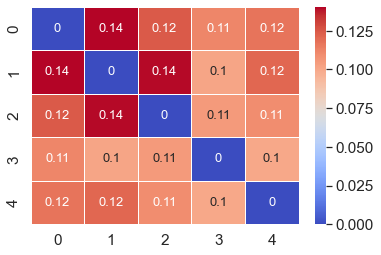

In [54]:
matrix = jaccard_sim
sns.set(font_scale=1.4)
sns.heatmap(matrix, cmap='coolwarm', annot=True, annot_kws={"size": 13}, linewidths=.5)

# show the plot
plt.show()

### Conclusion

###### It can be concluded that the author's writing style is quite distinctive and original. The scores suggested that the writing has no high similarity across documents stored in corpus. After the computation of Jaccard Similarity matrix was done, to understand the similarity in structure of text, a plot was made for better visualization. We can notice how decrease as we move away from the diagonal, which indicates that the documents are less similar to each other as we move further away from the diagonal. 
